In [35]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
import matplotlib.dates as mdates
from matplotlib import colors
import plotly.express as px
from scipy.signal import find_peaks
from wordcloud import WordCloud

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# File path
file_path = '/content/drive/MyDrive/Social media/avengers_sentiment.csv'

# Dataset Description

The "avengers_pre" csv file is composed of 11 columns and 58 926 rows. Here is a quick description to navigate through the columns:
* **author_submission**: indicates the author of the submission (i.e. reddit post) extracted;
* **title_post**: specifies the title of the submission;
* **score_post**: it's the result of the difference between the number of upvotes ('likes') and downvotes ('dislikes') obtained by that submission;
* **url_post**: url of the submission;
* **created_utc_post**: indicates the time at which the submission was posted;
* **comment_id**: states the id of that particular comment;
* **author_comment**: indicates the author of the comment;
* **body**: reports the full comment posted;
* **created_utc_comment**: indicates the time at which the coment was posted;
* **score_comment**: indicates the score obtained by that specific comment, resulting from the difference between upvotes and downvotes;
* **text_pre**: reports the prepreocessed text of that comment;
* **CompoundValue**, **NegativeValue**, **PositiveValue**, **NeutralValue**: numeric values assigned by the VADER sentiment model for each comment;
* **SentimentAssociated**: sentiment label assigned for each comment.




In [ ]:
# CSV file read
Avengers = pd.read_csv(file_path)

In [ ]:
Avengers

,author_submission,title_post,score_post,url_post,created_utc_post,comment_id,author_comment,body,created_utc_comment,score_comment,text_pre,CompoundValue,NegativeValue,PositiveValue,NeutralValue,SentimentAssociated
0,JonLuca,The Official AVENGERS: ENDGAME Release Megathr...,2287,https://www.reddit.com/r/marvelstudios/comment...,1.556226e+09,elsgggh,millionsofgoats,I’m a bit upset about how they handled Nat’s d...,2019-04-26 00:00:06,12,i be a bit upset about how they handle nat s d...,-0.9745,0.328,0.065,0.607,Negative
1,ScottFromScotland,The Official AVENGERS: ENDGAME Release Megathr...,1382,https://www.reddit.com/r/marvelstudios/comment...,1.556197e+09,elsggze,tkv_is_pro,"So basically, the DragonballZ type of time tra...",2019-04-26 00:00:17,2,so basically the dragonballz type of time trav...,0.0000,0.000,0.000,1.000,Neutral
2,JonLuca,The Official AVENGERS: ENDGAME Release Megathr...,2287,https://www.reddit.com/r/marvelstudios/comment...,1.556226e+09,elsghb0,WonkDog,Nanotech brah. Tony is peak intelligence. Even...,2019-04-26 00:00:23,10,nanotech brah tony be peak intelligence even r...,0.7003,0.000,0.309,0.691,Positive
3,JonLuca,The Official AVENGERS: ENDGAME Release Megathr...,2287,https://www.reddit.com/r/marvelstudios/comment...,1.556226e+09,elsgh9k,anotherboreddude,Honestly this felt like such an ending that I ...,2019-04-26 00:00:23,9,honestly this feel like such an ending that i ...,0.6705,0.000,0.224,0.776,Positive
4,JonLuca,The Official AVENGERS: ENDGAME Release Megathr...,2287,https://www.reddit.com/r/marvelstudios/comment...,1.556226e+09,elsgi3q,OnceOnThisIsland,"He's there, but they probably don't speak.",2019-04-26 00:00:40,5,he be there but they probably do not speak,0.0000,0.000,0.000,1.000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58921,mattwart,My Captain America colour pencil drawing (Aven...,18218,https://i.redd.it/6widbbiqd3j41.jpg,1.582646e+09,fiujykn,aminabz,wow. really just with colour pencil?,2020-02-26 18:47:14,2,wow really just with colour pencil,0.5859,0.000,0.432,0.568,Positive
58922,mattwart,My Captain America colour pencil drawing (Aven...,18218,https://i.redd.it/6widbbiqd3j41.jpg,1.582646e+09,fiuwpnr,mattwart,"Yup, the drawing was done with colour pencil (...",2020-02-26 20:40:53,2,yup the drawing be do with colour pencil prism...,0.0000,0.000,0.000,1.000,Neutral
58923,UnrealLuigi,'Avengers: Endgame' limited edition poster by ...,18043,https://i.redd.it/2cmyvbdx52h41.jpg,1.581760e+09,fmh8f03,blackbutterfree,"Looks to be missing Howard the Duck, Kraglin (...",2020-04-05 07:03:57,1,look to be miss howard the duck kraglin both b...,-0.7506,0.174,0.000,0.826,Negative
58924,gianben123,Avengers: Endgame | Tony & teenage Morgan Star...,17416,https://v.redd.it/5hhvq02eh8y31,1.573555e+09,fojdf5j,hwengiue,"First of all, Katherine Langford has nothing t...",2020-04-25 12:26:16,2,first of all katherine langford have nothing t...,-0.1757,0.071,0.053,0.876,Negative


# Dataset Exploration (before sentiment analysis)

In [ ]:
# Submission count with comments
Av_sub_count = Avengers.groupby(['title_post','author_submission', 'score_post']).size().sort_values(ascending= False).reset_index(name='Comments')
Av_sub_count

,title_post,author_submission,score_post,Comments
0,The Official AVENGERS: ENDGAME Release Megathr...,The_Asian_Hamster,1703,3070
1,The Official AVENGERS: ENDGAME Release Megathr...,PhoOhThree,4536,3050
2,The Official AVENGERS: ENDGAME Release Megathr...,JonLuca,2208,3038
3,The Official AVENGERS: ENDGAME Release Megathr...,JonLuca,2043,3010
4,The Official AVENGERS: ENDGAME Release Megathr...,ScottFromScotland,2514,3004
...,...,...,...,...
62,Avengers: Endgame - To The End,chanma50,4906,2
63,Marvel Studios’ Avengers: Endgame | Special Look,jesjes3000,26635,1
64,Avengers: Endgame Certified Fresh at 98% by Ro...,lochnussy,3386,1
65,'Avengers: Endgame' - Character Posters,Flamma_Man,8345,1


In [ ]:
# Top 10 Submission by score
Top_10_sub= Av_sub_count.sort_values(by='score_post',ascending= False)
Top_10_sub.head(10)

,title_post,author_submission,score_post,Comments
18,Avengers Endgame ($2.188B) passed Titanic and ...,matthewbassit,55680,974
61,Avengers: Endgame Official Trailer,HazzaPD,49240,2
15,Deleted scene from Avengers: Endgame.,RonnieMaz,45806,1760
14,'Avengers Endgame' Spoilers! From 2012 to 2019,mrnicegy26,44820,1782
9,"We’re Joe and Anthony Russo, directors of Marv...",Russo_Brothers,40601,2850
20,James Cameron congratulates Avengers: Endgame ...,chanma50,39724,713
28,Official still of Peggy & Steve from Avengers:...,Eric191,30338,459
39,"Stephen McFeely, Chris Hemsworth & Sweet Rabbi...",kahlkorver,28753,262
25,When it takes Avengers Endgame two weeks to gr...,ThoseAreBoldWordsB,28542,590
19,Elizabeth Olsen just shared this BTS Video for...,Sisiwakanamaru,27912,848


In [ ]:
# Tree map of top 10 author submission by score
custom_orange_scale = ['#FF2400', '#FF4500', '#FF6103', '#FF7F0E', '#FFA500', '#FFD700', '#FFEDB7', '#FFEDC0', '#FFEDC9', '#FFEDD2']
top_10_df= pd.DataFrame(Top_10_sub).head(10)

fig = px.treemap(
    top_10_df,
    path=['author_submission'],
    values='score_post',
    color_discrete_sequence=custom_orange_scale
)

fig.update_layout(
    width=800,
    height=500,
    margin=dict(t=5, l=5, r=5, b=5),
    font=dict(size=22)
)

fig.show()

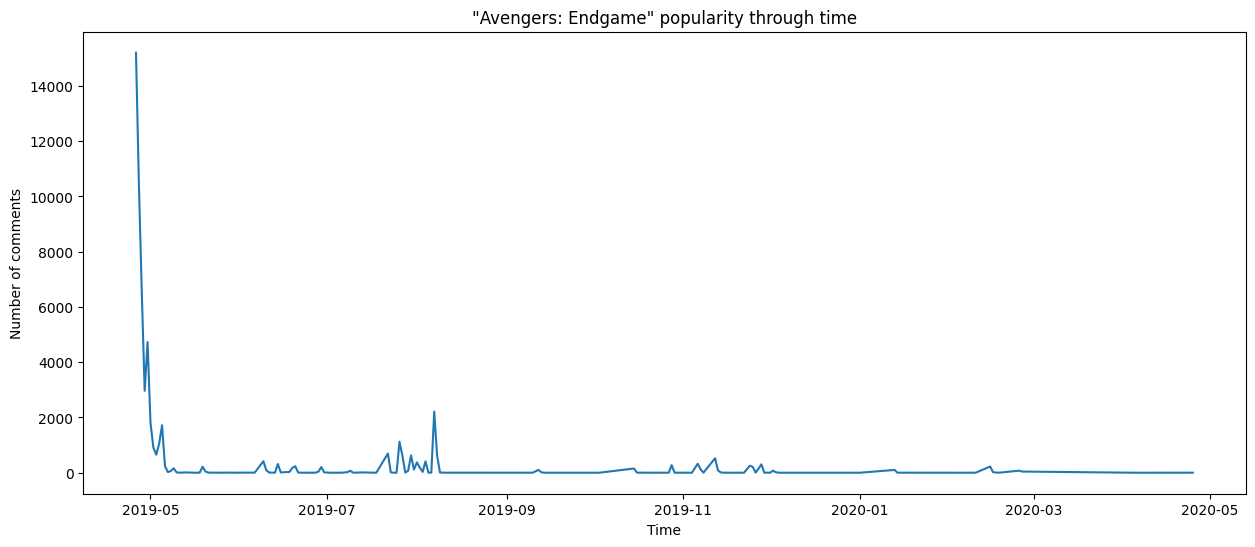

In [ ]:
# Computing the distribution of comments related to 'Avengers: Endgame'

# Changing into datetime
Avengers['created_utc_comment'] = pd.to_datetime(Avengers['created_utc_comment'])

# Adding a column containing only the year month and day of the comment
Avengers['Comment_Date'] = Avengers['created_utc_comment'].dt.date

# Counting number of comments per day
comment_day_count = Avengers.groupby('Comment_Date').size().reset_index(name='count')

# Creating the plot
plt.figure(figsize=(15, 6))
sns.lineplot(x='Comment_Date', y='count', data=comment_day_count)

plt.xlabel('Time')
plt.ylabel('Number of comments')
plt.title('"Avengers: Endgame" popularity through time')
plt.show()

In [ ]:
# Extracting the peak
peak_index = comment_day_count['count'].idxmax()
peak_date = comment_day_count.loc[peak_index, 'Comment_Date']

print(f'Peak: {peak_date}, Count: {comment_day_count.loc[peak_index, "count"]}')

Peak: 2019-04-26, Count: 15202


In [ ]:
peaks, _ = find_peaks(comment_day_count['count'], height=1000)

top_peaks = comment_day_count.iloc[peaks]
print('Top Peaks:')
print(top_peaks)

Top Peaks:
   Comment_Date  count
4    2019-04-30   4731
9    2019-05-05   1720
65   2019-07-26   1122
77   2019-08-07   2213


In [ ]:
Avengers['Comment_Date'] = pd.to_datetime(Avengers['Comment_Date'])

Avengers[Avengers['Comment_Date']=='2019-08-07'][['title_post', 'score_post', 'Comment_Date']]

,title_post,score_post,Comment_Date
52893,Captain America proves Ultron wrong at the end...,25398,2019-08-07
52894,"We’re Joe and Anthony Russo, directors of Marv...",40601,2019-08-07
52895,"We’re Joe and Anthony Russo, directors of Marv...",40601,2019-08-07
52896,"We’re Joe and Anthony Russo, directors of Marv...",40601,2019-08-07
52897,"We’re Joe and Anthony Russo, directors of Marv...",40601,2019-08-07
...,...,...,...
55101,"We’re Joe and Anthony Russo, directors of Marv...",40601,2019-08-07
55102,"We’re Joe and Anthony Russo, directors of Marv...",40601,2019-08-07
55103,"We’re Joe and Anthony Russo, directors of Marv...",40601,2019-08-07
55104,"We’re Joe and Anthony Russo, directors of Marv...",40601,2019-08-07


In [ ]:
# Inspecting the number of comments related only to the submission posted by the Russo brothers

Avengers[(Avengers['title_post']=='We’re Joe and Anthony Russo, directors of Marvel Studios’ Avengers: Endgame. AMA!') & (Avengers['Comment_Date'] == '2019-08-07')][['title_post', 'score_post', 'Comment_Date']]

,title_post,score_post,Comment_Date
52894,"We’re Joe and Anthony Russo, directors of Marv...",40601,2019-08-07
52895,"We’re Joe and Anthony Russo, directors of Marv...",40601,2019-08-07
52896,"We’re Joe and Anthony Russo, directors of Marv...",40601,2019-08-07
52897,"We’re Joe and Anthony Russo, directors of Marv...",40601,2019-08-07
52898,"We’re Joe and Anthony Russo, directors of Marv...",40601,2019-08-07
...,...,...,...
55101,"We’re Joe and Anthony Russo, directors of Marv...",40601,2019-08-07
55102,"We’re Joe and Anthony Russo, directors of Marv...",40601,2019-08-07
55103,"We’re Joe and Anthony Russo, directors of Marv...",40601,2019-08-07
55104,"We’re Joe and Anthony Russo, directors of Marv...",40601,2019-08-07


The highest peak of comments after the first week of the official release was registered in correspondance to the submission made in August by the Russo brothers, who were the directors of the Avengers: Endagame Marvel film.

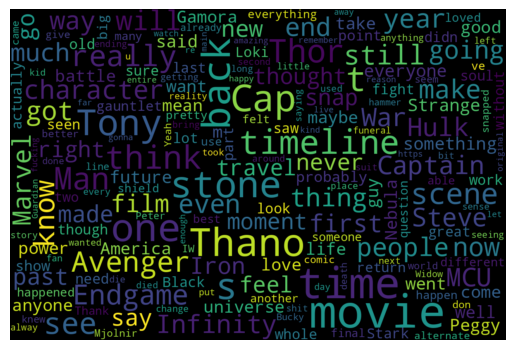

In [31]:
# Word Cloud
text = ' '.join(Avengers['body'])
wc = WordCloud(width=1200, height=800, max_font_size=110, collocations=False).generate(text)
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [32]:
kwords = WordCloud().process_text(text)
kwords

{'m': 1317,
 'bit': 1047,
 'upset': 146,
 'handled': 147,
 'Nat': 888,
 's': 5454,
 'death': 920,
 'died': 932,
 'terribly': 11,
 'seeing': 1162,
 'lying': 59,
 'ground': 139,
 'pool': 18,
 'blood': 114,
 'fucking': 800,
 'heartbreaking': 65,
 'arguably': 45,
 'made': 2777,
 'equal': 50,
 'sacrifice': 790,
 'Tony': 5583,
 'helped': 189,
 'save': 460,
 'universe': 1708,
 'yet': 876,
 'almost': 647,
 'nobody': 223,
 'acknowledged': 29,
 'end': 3472,
 'funeral': 676,
 'Fury': 246,
 'even': 3051,
 'comment': 555,
 'basically': 773,
 'DragonballZ': 1,
 'type': 202,
 'time': 4935,
 'future': 2251,
 'live': 1082,
 'nanotech': 116,
 'brah': 1,
 'peak': 64,
 'intelligence': 20,
 'Rocket': 843,
 'smartest': 19,
 'person': 549,
 'Earth': 1026,
 'honestly': 732,
 'felt': 1442,
 'ending': 791,
 'really': 3217,
 'know': 4188,
 'will': 3166,
 'happen': 1400,
 'draw': 70,
 'probably': 1922,
 'speak': 126,
 'kid': 1248,
 'come': 1607,
 'back': 3672,
 'heartwarming': 24,
 'possible': 556,
 'stone': 4077

In [39]:
df_kwords = pd.DataFrame(list(kwords.items()), columns=['keyword', 'count']).set_index('keyword').sort_values(by= 'count', ascending= False)
df_kwords.head(30)

,count
keyword,
movie,10217
Thano,7497
one,7121
think,6269
Cap,5869
Tony,5583
s,5454
Thor,5445
see,5230


<Axes: xlabel='keyword'>

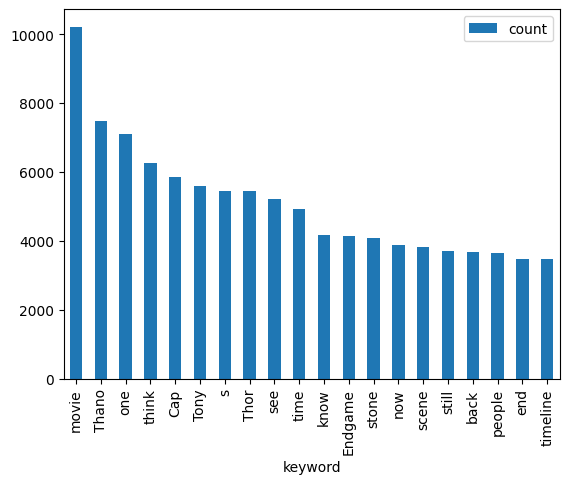

In [40]:
# Keywords visualized with a bar plot
%matplotlib inline
df_kwords.sort_values(by='count', ascending=False).head(20).plot.bar()

# Dataset Exploration (after sentiment analysis)

In [ ]:
# Checking the percentage for each sentiment label

total_posts = Avengers.shape[0]

negative_posts = Avengers[Avengers["SentimentAssociated"] == "Negative"].shape[0]
positive_posts = Avengers[Avengers["SentimentAssociated"] == "Positive"].shape[0]
neutral_posts = Avengers[Avengers["SentimentAssociated"] == "Neutral"].shape[0]

percentage_negative = (negative_posts / total_posts) * 100
percentage_positive = (positive_posts / total_posts) * 100
percentage_neutral = (neutral_posts / total_posts) * 100

print("The percentage of negative comments is {:.2f}%".format(percentage_negative))
print("The percentage of positive comments is {:.2f}%".format(percentage_positive))
print("The percentage of neutral comments is {:.2f}%".format(percentage_neutral))

The percentage of negative comments is 31.62%
The percentage of positive comments is 49.61%
The percentage of neutral comments is 18.77%


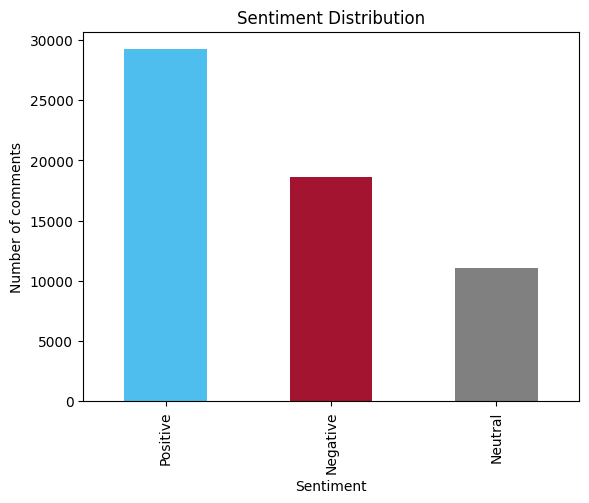

In [ ]:
sentiment_counts = Avengers['SentimentAssociated'].value_counts()

sentiment_counts.plot(kind='bar', color=['#4DBEEE', '#A2142F', 'gray'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of comments')
plt.show()

<ipython-input-17-873ad4b3f45f>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




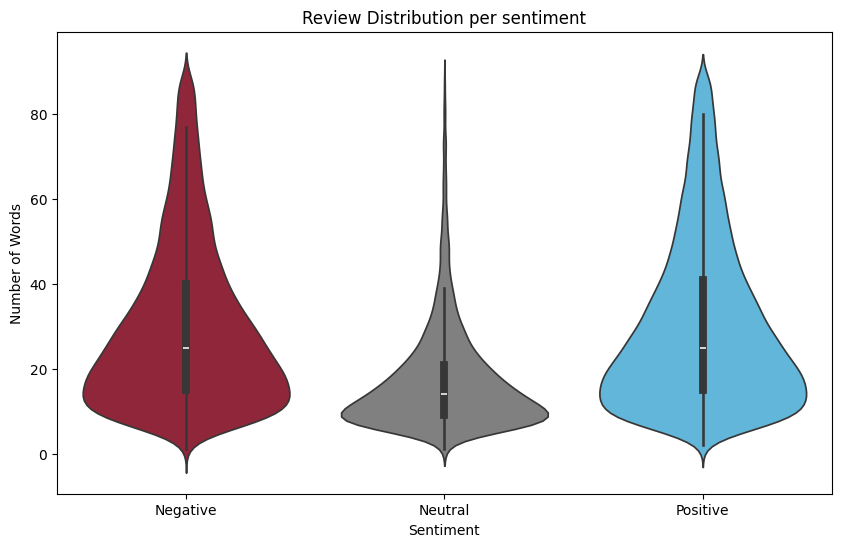

In [ ]:
# Distribution of reviews lenght (with full comment text contained in 'body')

# Computing number of words contained in 'body'
Avengers['num_words'] = Avengers['body'].apply(lambda x: len(x.split()))

# Outliers removal with IQR method
Q1 = Avengers['num_words'].quantile(0.25)
Q3 = Avengers['num_words'].quantile(0.75)
IQR = Q3 - Q1

df_filtered = Avengers[~((Avengers['num_words'] < (Q1 - 1.5 * IQR)) | (Avengers['num_words'] > (Q3 + 1.5 * IQR)))]

# Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='SentimentAssociated', y='num_words', data=df_filtered, orient='v', palette=['#A2142F', 'gray', '#4DBEEE'])

plt.title('Review Distribution per sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of Words')

plt.show()

In [ ]:
Av_comments = Avengers.groupby(['title_post','comment_id','author_comment','Comment_Date','body' ,'score_comment', 'SentimentAssociated']).size().sort_values(ascending= False).reset_index(name='Comments')
Av_comments.head()

,title_post,comment_id,author_comment,Comment_Date,body,score_comment,SentimentAssociated,Comments
0,"""Avengers: Endgame"" fan art by Paris Alleyne",fe6rmg5,NaiadoftheSea,2020-01-13,Source: [Paris Alleyne's Artstation](https://...,31,Neutral,1
1,The Official AVENGERS: ENDGAME Release Megathr...,elstf2a,GuitaristHeimerz,2019-04-26,I spent the whole movie thinking “Am I trippin...,11,Negative,1
2,The Official AVENGERS: ENDGAME Release Megathr...,elsta4m,WallaceHS,2019-04-26,Thanos mothership stopped following Thanos ord...,12,Negative,1
3,The Official AVENGERS: ENDGAME Release Megathr...,elstajp,ArchTemperedKoala,2019-04-26,Woah I just realized Thanos lost because he br...,47,Negative,1
4,The Official AVENGERS: ENDGAME Release Megathr...,elstapp,NurtureBoyRocFair,2019-04-26,"That was the Power Stone, maybe the Soul Stone...",8,Neutral,1


In [ ]:
# Top 10 Comments by score
Top_10_comment= Av_comments.sort_values(by='score_comment',ascending= False)
Top_10_comment.head(10)

,title_post,comment_id,author_comment,Comment_Date,body,score_comment,SentimentAssociated,Comments
34746,'Avengers Endgame' Spoilers! From 2012 to 2019,elwzwub,kenbarbforever,2019-04-27,Endgame culminated EVERYTHING.,8788,Neutral,1
29104,Deleted scene from Avengers: Endgame.,ev1pbph,ThinboyBulk324,2019-07-26,Damn. I love the emphasis on Strange. Really...,8777,Positive,1
34659,'Avengers Endgame' Spoilers! From 2012 to 2019,elxa7uy,SilentShadows_X_,2019-04-27,Cap holding Stormbreaker and Thor holding his ...,8316,Positive,1
18552,"We’re Joe and Anthony Russo, directors of Marv...",ew9a6s8,Russo_Brothers,2019-08-07,"Awesome questions, gang. We could sit here al...",7996,Positive,1
14507,"We’re Joe and Anthony Russo, directors of Marv...",ew8z9gb,Russo_Brothers,2019-08-07,Joe: We spent a lot of time in the edit room p...,7085,Positive,1
51130,The Official AVENGERS: ENDGAME Easter Egg Mega...,eluzwwp,UncannyHavok,2019-04-26,Hank Pym's original Ant-Man helmet in the 70s,6989,Positive,1
29096,Deleted scene from Avengers: Endgame.,ev1nk6k,discourse_commuter,2019-07-26,I see why this was cut. The funeral was more p...,6987,Negative,1
33510,Avengers Endgame ($2.188B) passed Titanic and ...,emkhwtj,JGLP,2019-05-05,"Avatar, we've come to bargain\n\nEdit 1: You a...",6913,Positive,1
51135,The Official AVENGERS: ENDGAME Easter Egg Mega...,eluzzcu,SavioVegaGuy,2019-04-26,Hulk was eating Hulka Hulka Burnin’ Fudge duri...,6803,Neutral,1
51140,The Official AVENGERS: ENDGAME Easter Egg Mega...,elv02dq,SoulTemerity,2019-04-26,Black Panther remembering Clint's name after n...,6498,Negative,1
